**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score, pairwise_distances, make_scorer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from scipy.spatial.distance import pdist, cdist
from scipy.stats import mode

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    
    def __init__(self, n_neighbors, metric='euclidean', algorithm='brute'):     
        self.n_neighbors = n_neighbors
        self.metric = metric
        if algorithm == 'brute':
            self.alg = 0
        elif algorithm == 'kd_tree':
            self.alg = 1
        else:
            raise 
            
            
    def fit(self, X, y): 
        if self.alg == 0:
            self.X = X
            self.y = y
        elif self.alg == 1:
            self.y = y
            self.tree = KDTree(X, metric = self.metric)
 

    def predict(self, X):
        if self.alg == 0:
            dist = pairwise_distances(X, self.X, self.metric)
            dist = np.argsort(dist, axis = 1)
            return mode(self.y[dist[:,:self.n_neighbors]], 1)[0].flatten()
        elif self.alg == 1:
            neighbors = self.tree.query(X, self.n_neighbors, False)
            return mode(self.y[neighbors], 1)[0].flatten()
        
    
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 801 µs, sys: 248 µs, total: 1.05 ms
Wall time: 808 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 14.1 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 3.44 ms, sys: 2.14 ms, total: 5.58 ms
Wall time: 3.61 ms


array([1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 2.69 ms, sys: 1.67 ms, total: 4.36 ms
Wall time: 2.75 ms


array([1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 929 µs, sys: 196 µs, total: 1.13 ms
Wall time: 980 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 184 µs, sys: 18 µs, total: 202 µs
Wall time: 199 µs


In [17]:
%time clf.predict(X_test)

CPU times: user 2.86 ms, sys: 1.17 ms, total: 4.03 ms
Wall time: 3.03 ms


array([0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 2.38 ms, sys: 1.38 ms, total: 3.76 ms
Wall time: 2.48 ms


array([0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
vector = CountVectorizer()
X_train = vector.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
folds = KFold(3, shuffle = True)
fold_generator = folds.split(X_train, target) 

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
def cross_validation_score(k, X_train, target, metric='euclidean'):
    res = []
    knn = MyKNeighborsClassifier(k, metric)
    fold_generator = folds.split(X_train, target)
    for train, test in fold_generator:
        knn.fit(X_train[train], target[train])
        res.append(accuracy_score(target[test], knn.predict(X_train[test])))
    return np.asarray(res).mean() 

def k_optimization(X_train, target, metric='euclidean'):
    res = []
    for k in range(1,11):
        res.append(cross_validation_score(k, X_train, target, metric))
        k = np.asarray(res).argsort()[-1] + 1
    return k, res

In [25]:
k, res = k_optimization(X_train, target)
print('k_neighbors =',k, '\nCross validation score =', res[k])

k_neighbors = 1 
Cross validation score = 0.18667126633564424


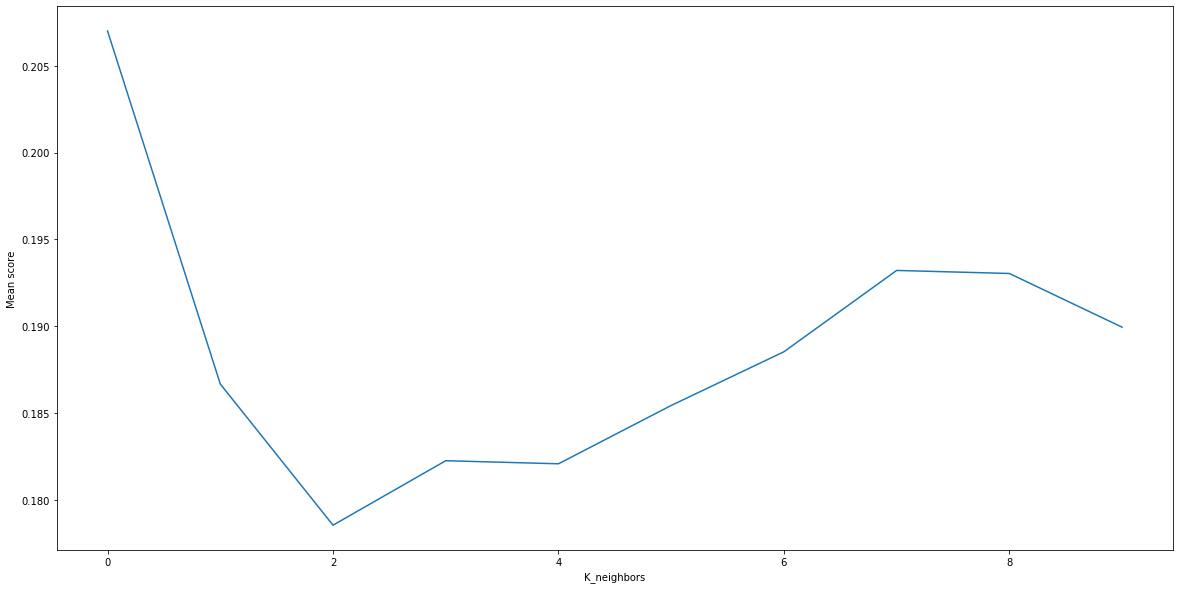

In [26]:
fig = plt.figure(figsize= (20,10))
ax=fig.add_subplot(111)
ax.set_xlabel('K_neighbors')
ax.set_ylabel('Mean score')
plt.plot(res);

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [27]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [28]:
data = newsgroups['data']
test_target = newsgroups['target']

In [29]:
tfidf = TfidfVectorizer()
X_test = tfidf.fit_transform(data)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [ ]:
k, res = k_optimization(X_train, target)
print('k_neighbors =',k, 'Cross validation score =', res[k])

knn = MyKNeighborsClassifier(k, metric='cosine')
knn.fit(X_train, target)
print(accuracy_score(test_target, knn.predict(X_test))) #не работает